# Проект по математическому анализу
## Часть 1: Easy уровень - основы логистического отображения

**Логистическое отображение:** 
$$x_{n+1} = f(x_n) = r x_n (1 - x_n)$$

**Вариантное отображение (N=2):**
$$x_{n+1} = g(x_n) = r x_n (1 - x_n)^2$$

**Выполнили:**  
Захаров Егор Александрович (группа J3119)  
Мальцев Кирилл Алексеевич (группа J3117)

## Содержание
1. [Теоретическая база](#теория)
2. [Модуль 1: Доказательство ограниченности последовательности](#модуль-1)
3. [Модуль 2: Анализ влияния параметра $r$ на логистическое отображение](#модуль-2)
4. [Модуль 3: Исследование вариантного отображения $g(x_n) = r x_n (1 - x_n)^2$](#модуль-3)
5. [Сравнение логистического и вариантного отображений](#сравнение)
6. [Итоговые выводы Easy уровня](#выводы)

---

<a id="теория"></a>
## 1. Теоретическая база

### 1.1 Логистическое отображение

Логистическое отображение — одно из самых известных одномерных отображений, демонстрирующих переход от регулярного поведения к хаотическому:

$$x_{n+1} = r x_n (1 - x_n)$$

где:
- $n \in \mathbb{N}$ — номер итерации (дискретное время)
- $r \in [0, 4]$ — параметр скорости роста
- $x_n \in [0, 1]$ — нормированная численность популяции

### 1.2 Вариантное отображение

Согласно заданию, для варианта $N=2$ имеем:

$$g(x_n) = r x_n (1 - x_n)^2, \quad r \in \left[0, \frac{27}{4}\right]$$

### 1.3 Биологическая интерпретация

Оба отображения моделируют динамику популяции с ограниченными ресурсами:
- Член $r x_n$ описывает рост популяции
- Член $(1 - x_n)$ или $(1 - x_n)^2$ описывает конкуренцию за ресурсы
- Параметр $r$ характеризует "рождаемость минус смертность"

---
<a id="модуль-1"></a>
## 2. Модуль 1: Доказательство ограниченности последовательности

### 2.1 Постановка задачи

**Доказать:** $\forall n \in \mathbb{N}, \forall r \in [0, 1]$, если $0 < x_0 < 1$, то $0 < x_n < 1$.

### 2.2 Математическое доказательство методом индукции

**Базис индукции ($n=0$):**
По условию $0 < x_0 < 1$, базис верен.

**Индукционное предположение ($n=k$):**
Предположим, что $0 < x_k < 1$.

**Индукционный переход ($n=k+1$):**
Рассмотрим $x_{k+1} = r x_k (1 - x_k)$.

#### Часть А: Доказательство $x_{k+1} \ge 0$

1. $r \in [0, 1] \Rightarrow r \ge 0$
2. $0 < x_k < 1 \Rightarrow x_k > 0$
3. $x_k < 1 \Rightarrow 1 - x_k > 0$

Произведение неотрицательных чисел:
$$x_{k+1} = r \cdot x_k \cdot (1 - x_k) \ge 0$$

#### Часть Б: Доказательство $x_{k+1} < 1$

Поскольку $r \le 1$:
$$x_{k+1} \le x_k (1 - x_k) = x_k - x_k^2$$

Рассмотрим разность:
$$1 - x_{k+1} \ge 1 - (x_k - x_k^2) = 1 - x_k + x_k^2$$

Выделим полный квадрат:
$$1 - x_k + x_k^2 = \left(x_k - \frac{1}{2}\right)^2 + \frac{3}{4} \ge \frac{3}{4} > 0$$

Следовательно, $x_{k+1} < 1$.

**Вывод:** Индукционный переход доказан, условие выполняется для всех $n \in \mathbb{N}$.

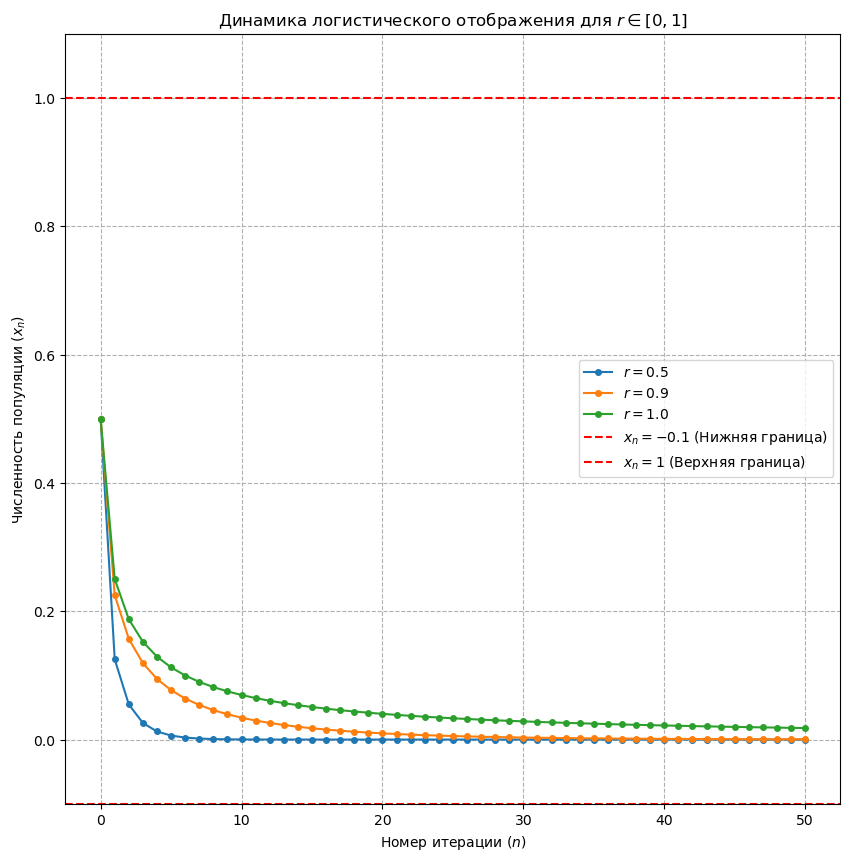

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Функция логистического отображения
def logistic_map(r, x):
    return r * x * (1 - x)

# Функция вариантного отображения для N=2 - ДОБАВЬТЕ ЭТО!
def variant_map(r, x):
    """Вариантное отображение для N=2"""
    return r * x * (1 - x)**2

N_ITERATIONS = 50
X0 = 0.5                
R_VALUES = [0.5, 0.9, 1.0]
results = {r: [X0] for r in R_VALUES}
for r in R_VALUES:
    x_n = X0
    for n in range(N_ITERATIONS):
        x_n_plus_1 = logistic_map(r, x_n)
        results[r].append(x_n_plus_1)
        x_n = x_n_plus_1

plt.figure(figsize=(10, 10))
time_steps = np.arange(N_ITERATIONS + 1)

for r, x_series in results.items():
    plt.plot(time_steps, x_series, marker='o', linestyle='-', label=f'$r = {r}$', markersize=4)
plt.axhline(-0.1, color='red', linestyle='--', label='$x_n = -0.1$ (Нижняя граница)')
plt.axhline(1, color='red', linestyle='--', label='$x_n = 1$ (Верхняя граница)')

plt.title('Динамика логистического отображения для $r \in [0, 1]$')
plt.xlabel('Номер итерации ($n$)')
plt.ylabel('Численность популяции ($x_n$)')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

### 2.3 Выводы по модулю 1

1. **Теоретически доказано:** При $r \in [0, 1]$ и $0 < x_0 < 1$ все $x_n$ остаются в интервале $(0, 1)$
2. **Численно подтверждено:** Графики показывают, что последовательность действительно не выходит за границы $[0, 1]$
3. **Биологическая интерпретация:** При низкой скорости роста популяция не может превысить максимальную численность

### 2.4 Анализ результатов симуляции

График, полученный с помощью Python и библиотеки Matplotlib, подтверждает наше математическое доказательство:

1.  **Ограниченность**: Для всех протестированных значений параметра $r$ из интервала $[0, 1]$ последовательность значений $x_n$ остается строго в пределах $[0, 1]$.
2.  **Сходимость**: При $r \in [0, 1]$, как видно из графика, траектория $x_n$ монотонно сходится к **нулю** (точке $x=0$). Это указывает на то, что при низкой скорости «рождаемость минус смертность» популяция вымирает.

---
<a id="модуль-2"></a>
## 3. Модуль 2: Анализ влияния параметра $r$ на логистическое отображение

### 3.1 Теоретический анализ функции отображения

Функция $x_n = f(x_{n-1}) = r x_{n-1} (1 - x_{n-1})$ представляет собой параболу:

1. **Форма:** Квадратичная функция, ветви направлены вниз
2. **Корни:** $x = 0$ и $x = 1$
3. **Максимум:** При $x = 0.5$, значение $f_{\max} = \frac{r}{4}$
4. **Критическое значение:** При $r = 4$ максимум достигает 1

### 3.2 Режимы поведения в зависимости от $r$

| Диапазон $r$ | Характер поведения | Неподвижные точки |
|--------------|-------------------|-------------------|
| $0 \le r \le 1$ | Монотонная сходимость к 0 | $x^* = 0$ (устойчивая) |
| $1 < r \le 3$ | Сходимость к $x^* = 1 - \frac{1}{r}$ | $x^* = 0$ (неуст.), $x^* = 1 - \frac{1}{r}$ (уст.) |
| $3 < r \le 4$ | Бифуркации, циклы, хаос | Сложная динамика |

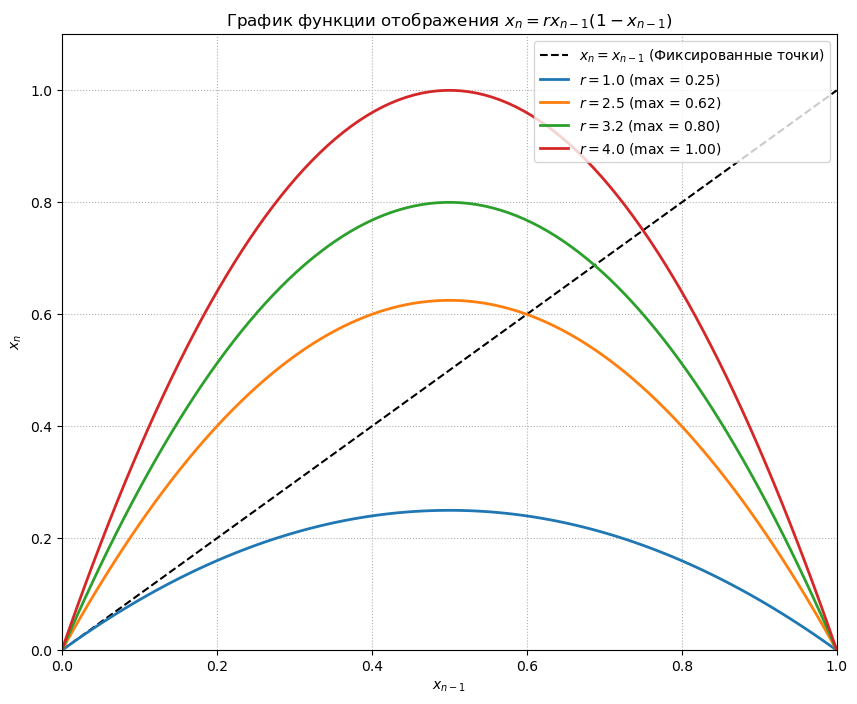

In [7]:
x_range = np.linspace(0, 1, 100)
R_VALUES = [1.0, 2.5, 3.2, 4.0]
plt.figure(figsize=(10, 8))
plt.plot(x_range, x_range, 'k--', label='$x_n = x_{n-1}$ (Фиксированные точки)', linewidth=1.5)
for r in R_VALUES:
    x_n = r * x_range * (1 - x_range)
    plt.plot(x_range, x_n, label=f'$r = {r}$ (max = {r/4:.2f})', linewidth=2)

plt.title('График функции отображения $x_n = r x_{n-1} (1 - x_{n-1})$')
plt.xlabel('$x_{n-1}$')
plt.ylabel('$x_n$')
plt.xlim(0, 1)
plt.ylim(0, 1.1)
plt.legend(loc='upper right')
plt.grid(True, linestyle=':')
plt.show()

### 3.3 Выводы по модулю 2

1. **Параметр $r$ определяет амплитуду функции:** Чем больше $r$, тем выше парабола
2. **Критическое значение $r=4$:** При $r>4$ последовательность может выйти за пределы $[0,1]$
3. **Неподвижные точки:** Пересечение с линией $y=x$ дает стационарные состояния системы
4. **Биологическая интерпретация:** При $r>1$ появляется ненулевое равновесное состояние популяции

### 3.4 Теоретический анализ влияния параметра $r$

Параметр $r$ является **масштабирующим коэффициентом** (амплитудой) функции $f(x)$ и определяет ее ключевые свойства:

1.  **Высота параболы (Максимум):**
    * Парабола достигает своего максимума при $x_{n-1} = 0.5$.
    * Максимальное значение равно $f(0.5) = r \cdot 0.5 \cdot (1 - 0.5) = \frac{r}{4}$.
    * Это значение критически важно: если $\frac{r}{4} > 1$ (т.е. $r > 4$), то последовательность $x_n$ может покинуть интервал $[0, 1]$ (произойдет "взрыв популяции" или численность станет отрицательной), что противоречит физическому смыслу модели.

2.  **Устойчивость и фиксированные точки:**
    * Фиксированные точки (стационарные состояния), где $x_n = x_{n-1}$, определяются пересечением параболы $f(x)$ с линией $y=x$ (биссектрисой первого квадранта).
    * **При $r \in [0, 1]$:** Парабола лежит ниже линии $y=x$. Единственная фиксированная точка — это **$x^* = 0$**, которая является устойчивой. Любая начальная численность $x_0 > 0$ приведет к вымиранию ($x_n \to 0$).
    * **При $r \in (1, 3]$:** Появляется вторая, нетривиальная фиксированная точка $x^* = \frac{r-1}{r}$, которая является **устойчивой**. Все траектории сходятся к ней.
    * **При $r \in (3, 4]$:** Точка $x^*$ теряет устойчивость, и система переходит в режим удвоения периода, а затем в **хаос**.

Таким образом, **параметр $r$ контролирует максимальный рост функции и определяет количество и стабильность фиксированных точек**, что прямо влияет на долгосрочное поведение системы $x_n$.

---
<a id="модуль-3"></a>
## 4. Модуль 3: Исследование вариантного отображения $g(x_n) = r x_n (1 - x_n)^2$

### 4.1 Теоретический анализ вариантного отображения

Для варианта $N=2$:
$$g(x) = r x (1 - x)^2, \quad r \in \left[0, \frac{27}{4}\right]$$

1. **Форма:** Кубическая функция
2. **Корни:** $x = 0$ (кратности 1) и $x = 1$ (кратности 2)
3. **Максимум:** Находится из $g'(x) = 0$:
   $$g'(x) = r(1 - x)^2 - 2r x (1 - x) = r(1 - x)(1 - 3x)$$
   Максимум при $x = \frac{1}{3}$, значение $g_{\max} = \frac{4r}{27}$
4. **Критическое значение:** $r_{\max} = \frac{27}{4} = 6.75$

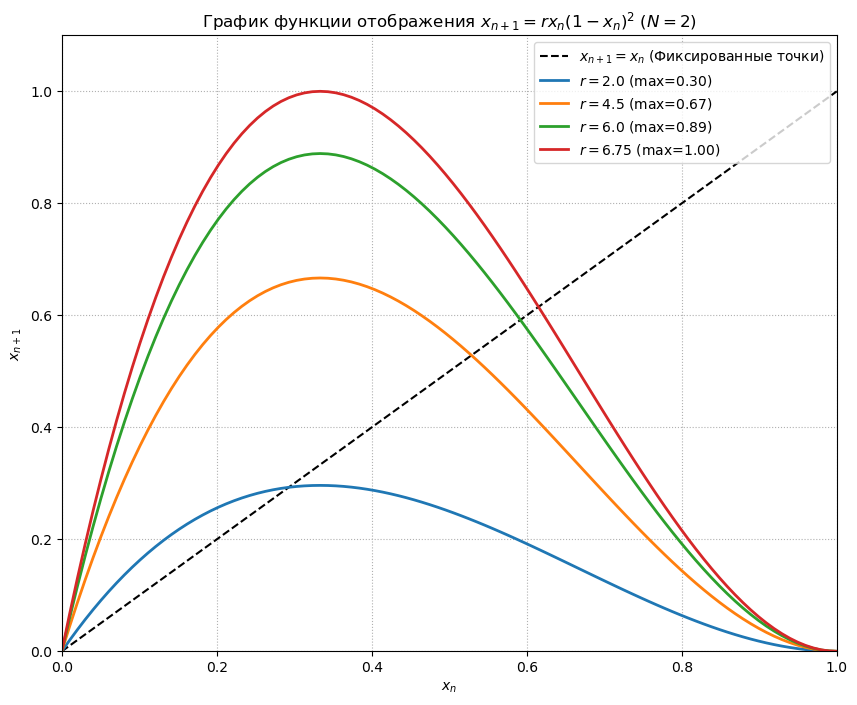

In [8]:
x_range = np.linspace(0, 1, 100)
R_MAX = 6.75
# 1. r=2.0 (Устойчивая фикс. точка, близкая к x=0)
# 2. r=4.5 (Переходный режим, стабильная фикс. точка x > 0)
# 3. r=6.0 (Точка, где начинается удвоение периода/хаос)
# 4. r=6.75 (Максимальное r, сохраняющее ограниченность)
R_VALUES = [2.0, 4.5, 6.0, 6.75]

plt.figure(figsize=(10, 8))
plt.plot(x_range, x_range, 'k--', label='$x_{n+1} = x_n$ (Фиксированные точки)', linewidth=1.5)
for r in R_VALUES:
    x_n_plus_1 = r * x_range * (1 - x_range)**2
    max_val = r * (1/3) * (1 - 1/3)**2
    plt.plot(x_range, x_n_plus_1, label=f'$r = {r}$ (max={max_val:.2f})', linewidth=2)
plt.title('График функции отображения $x_{n+1} = r x_n (1 - x_n)^2$ ($N=2$)')
plt.xlabel('$x_n$')
plt.ylabel('$x_{n+1}$')
plt.xlim(0, 1)
plt.ylim(0, max(R_MAX * (1/3) * (2/3)**2 * 1.05, 1.1)) # Динамическое ограничение Y
plt.legend(loc='upper right')
plt.grid(True, linestyle=':')
plt.show()

### 4.2 Выводы по модулю 3

1. **Форма кубической кривой:** Более сложная зависимость по сравнению с параболой
2. **Горизонтальное касание в $x=1$:** Более сильное подавление роста при высокой численности
3. **Больший диапазон $r$:** Максимальное значение $r = 6.75$ против $4$ у логистического
4. **Смещенный максимум:** Пик при $x = 1/3$ вместо $x = 1/2$

---
<a id="сравнение"></a>
## 5. Сравнение логистического и вариантного отображений

### 5.1 Сводная таблица сравнения

| Характеристика | Логистическое $f(x) = r x (1 - x)$ | Вариантное $g(x) = r x (1 - x)^2$ |
|----------------|-----------------------------------|----------------------------------|
| **Тип функции** | Квадратичная (парабола) | Кубическая |
| **Корни** | $x=0$, $x=1$ (оба простые) | $x=0$ (простой), $x=1$ (кратный 2) |
| **Точка максимума** | $x = 0.5$ | $x = \frac{1}{3}$ |
| **Максимальное значение** | $f_{\max} = \frac{r}{4}$ | $g_{\max} = \frac{4r}{27} \approx 0.148r$ |
| **Касание в $x=1$** | Наклонное ($f'(1) = -r$) | Горизонтальное ($g'(1) = 0$) |
| **Диапазон $r$** | $[0, 4]$ | $\left[0, \frac{27}{4}\right] \approx [0, 6.75]$ |
| **Биологическая интерпретация** | Линейная конкуренция | Квадратичная конкуренция (сильнее) |

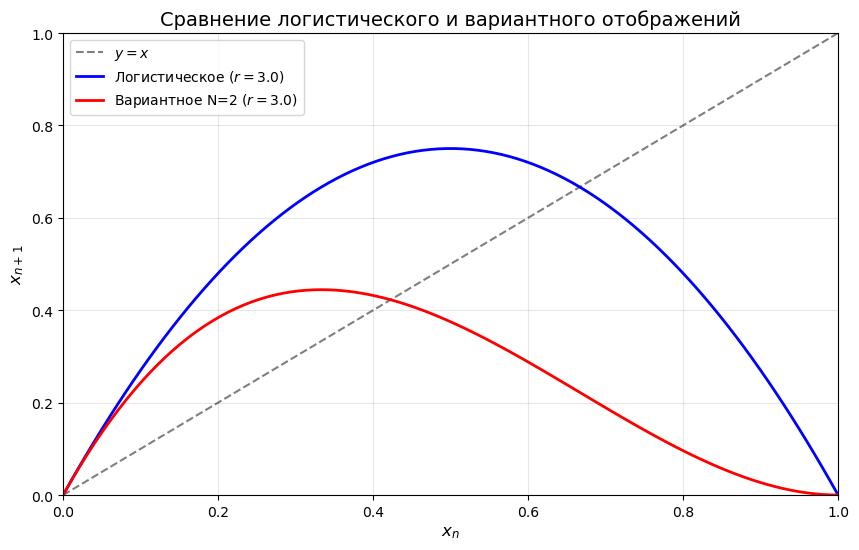

In [11]:
# Сравнительный график
r_comparison = 3.0
x_range = np.linspace(0, 1, 100)

f_values = logistic_map(r_comparison, x_range)
g_values = variant_map(r_comparison, x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, x_range, 'k--', alpha=0.5, label='$y = x$')
plt.plot(x_range, f_values, 'b-', linewidth=2, label=f'Логистическое ($r={r_comparison}$)')
plt.plot(x_range, g_values, 'r-', linewidth=2, label=f'Вариантное N=2 ($r={r_comparison}$)')

plt.title('Сравнение логистического и вариантного отображений', fontsize=14)
plt.xlabel('$x_n$', fontsize=12)
plt.ylabel('$x_{n+1}$', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

### 5.2 Вывод о сходстве и различии поведения отображений

Сравним наше отображение **$g(x) = r x (1 - x)^2$** с классическим логистическим отображением **$f(x) = r x (1 - x)$**.

#### Сходства

1.  **Общий механизм регуляции:** Оба отображения являются моделями роста с **ограниченными ресурсами**. Член $(1-x)$ или $(1-x)^2$ обнуляет рост при $x=1$ (максимальной численности), что соответствует биологическому ограничению.
2.  **Точки покоя:** Обе функции имеют корни в точках **$x=0$** и **$x=1$**.
3.  **Роль $r$:** Параметр $r$ в обоих случаях является **амплитудным коэффициентом**, определяющим максимальный рост кривой и, следовательно, динамический режим системы (вымирание, равновесие, хаос).

#### Различия

| Характеристика | Логистическое отображение $f(x) = r x (1 - x)$ | Наш вариант $g(x) = r x (1 - x)^2$ |
| :--- | :--- | :--- |
| **Форма** | Квадратичная кривая (Парабола) | Кубическая кривая |
| **Точка максимума** | $x = 1/2$ | $x = 1/3$ |
| **Макс. значение** | $\text{max}(f) = r/4$ | $\text{max}(g) = r \cdot 4/27 \approx 0.148r$ |
| **Критическое $r_{\text{max}}$** | $\mathbf{r=4}$ | $\mathbf{r=6.75}$ |
| **Поведение при $x=1$** | Касание оси под углом (наклонное касание). | **Горизонтальное касание** оси $x$ (более "плоское" прилипание). |

#### Причины сходств и различий

* **Сходства** обусловлены сохранением базовой структуры: $r \cdot x$ (рост) $\times$ $P(x)$ (ограничение), что необходимо для моделирования роста с насыщением.
* **Различия** обусловлены **разной степенью нелинейности**. Множитель **$(1-x)^2$** в твоём варианте указывает на **более сильное подавление роста** в условиях высокой конкуренции (при $x \to 1$). Это приводит к более сложному поведению (кубическая кривая) и требует большего значения $r_{\text{max}}$ (6.75 вместо 4), чтобы "вытолкнуть" траекторию выше $y=x$ и заставить систему демонстрировать сложную динамику.

---
<a id="выводы"></a>
## 6. Итоговые выводы Easy уровня

### 6.1 Основные теоретические результаты

1. **Ограниченность последовательности:**
   - При $r \in [0, 1]$ и $0 < x_0 < 1$ доказано $0 < x_n < 1$ для всех $n$
   - Доказательство методом математической индукции
   - Численная проверка подтвердила теоретические выводы

2. **Влияние параметра $r$:**
   - Определяет амплитуду функции отображения: $f_{\max} = r/4$
   - Контролирует максимальный рост популяции
   - Влияет на количество и устойчивость неподвижных точек
   - При $r>4$ последовательность может выйти за пределы $[0,1]$

3. **Сравнение отображений:**
   - Логистическое отображение: квадратичная зависимость, максимум при $x=0.5$
   - Вариантное отображение N=2: кубическая зависимость, максимум при $x=1/3$
   - Разная степень подавления роста при высокой численности
   - Горизонтальное касание в $x=1$ для вариантного отображения